# Feasibility Study & Recommendations for Opening a Restaurant in Pune
## IBM Applied Data Science Capstone Project: The Battle of Neighborhoods

## Table of Contents

Section 2: Retrieve the fetched data stored in CSV and start exploratory data analysis

Import required modules

In [1]:
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd
import folium
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import matplotlib.cm as cm
import re
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Read data fetched using Foursquare API

In [2]:
fsq = pd.read_csv('foursquare.csv')
fsq.head()

name        lat        lng pincode       type
0                   Vohuman Cafe  18.532555  73.876834  411001  Breakfast
1              EVVIVA Sky Lounge  18.531413  73.876708  411001     Lounge
2  Hidden Place - The Crazy Frog  18.536546  73.875394  411001        Pub
3                        Gajalee  18.527478  73.878215  411001    Seafood
4                    Conrad Pune  18.535020  73.883056  411001      Hotel

Look at the basic details of the dataset: features, number of records, data types and basic statistics

In [3]:
fsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2999 non-null   object 
 1   lat      2999 non-null   float64
 2   lng      2999 non-null   float64
 3   pincode  2999 non-null   object 
 4   type     2999 non-null   object 
dtypes: float64(2), object(3)
memory usage: 117.3+ KB


In [5]:
fsq.describe(include="all")

name          lat          lng pincode    type
count              2999  2999.000000  2999.000000    2999    2999
unique              956          NaN          NaN      81     162
top     Cafe Coffee Day          NaN          NaN  411004  Indian
freq                 66          NaN          NaN     331     529
mean                NaN    18.524598    73.851102     NaN     NaN
std                 NaN     0.038022     0.058734     NaN     NaN
min                 NaN    18.116703    73.736801     NaN     NaN
25%                 NaN    18.509656    73.830742     NaN     NaN
50%                 NaN    18.518861    73.843520     NaN     NaN
75%                 NaN    18.529587    73.870890     NaN     NaN
max                 NaN    18.827556    75.028397     NaN     NaN

Verify whether if there are any missing values

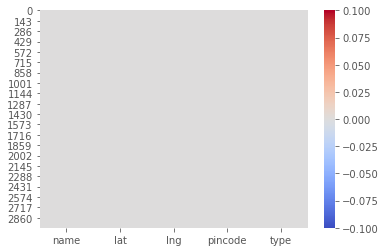

In [6]:
sns.heatmap(fsq.isnull(), cmap='coolwarm')

Read the resaturants data fetched from Zomato

In [7]:
zom = pd.read_csv('zomato.csv')
zom.head()

name   latitude  longitude  average_cost_for_two  \
0         South & More  18.532390  73.876747                   300   
1       Cafe Farmhouse  18.532562  73.876630                   300   
2             Maharaja  18.532633  73.876638                   600   
3         Vohuman Cafe  18.532582  73.876591                   250   
4  Madras Coffee House  18.532663  73.876513                   350   

   price_range  aggregate_rating  votes                              cuisines  \
0            1               3.4     51  South Indian, Street Food, Beverages   
1            1               0.0      0                  Fast Food, Beverages   
2            2               4.1    188  Maharashtrian, North Indian, Chinese   
3            1               4.6   4603                           Street Food   
4            1               4.1    533               South Indian, Beverages   

                                          highlights  all_reviews_count  \
0  ['Dinner', 'Delivery', 'Breakfast', 'Lunch', '...                 14   
1  ['Dinner', 'Cash', 'Breakfast', 'Lunch', 'Take...                  0   
2  ['Lunch', 'Cash', 'Takeaway Available', 'Debit...                 66   
3  ['Cash', 'Takeaway Available', 'Breakfast', 'L...               1996   
4  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...                 76   

   photo_count  has_table_booking  has_online_delivery  
0           12                  0                    1  
1            0                  0                    1  
2           77                  0                    1  
3         1951                  0                    1  
4          116                  0                    1

Look at the basic details of the dataset: features, number of records, data types and basic statistics

In [8]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  3684 non-null   object 
 1   latitude              3684 non-null   float64
 2   longitude             3684 non-null   float64
 3   average_cost_for_two  3684 non-null   int64  
 4   price_range           3684 non-null   int64  
 5   aggregate_rating      3684 non-null   float64
 6   votes                 3684 non-null   int64  
 7   cuisines              3671 non-null   object 
 8   highlights            3684 non-null   object 
 9   all_reviews_count     3684 non-null   int64  
 10  photo_count           3684 non-null   int64  
 11  has_table_booking     3684 non-null   int64  
 12  has_online_delivery   3684 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 374.3+ KB


In [9]:
zom.describe()

latitude    longitude  average_cost_for_two  price_range  \
count  3684.000000  3684.000000           3684.000000  3684.000000   
mean     18.536106    73.859903            493.276330     1.503800   
std       0.058119     0.093835            393.961947     0.712738   
min      17.789545    73.732160              0.000000     1.000000   
25%      18.510348    73.821148            250.000000     1.000000   
50%      18.529819    73.850644            400.000000     1.000000   
75%      18.564842    73.888779            600.000000     2.000000   
max      18.664850    75.416458           3200.000000     4.000000   

       aggregate_rating         votes  all_reviews_count  photo_count  \
count       3684.000000   3684.000000        3684.000000  3684.000000   
mean           2.686889    544.430782          81.486428    94.185125   
std            1.625319   1723.664196         239.547595   325.844623   
min            0.000000      0.000000           0.000000     0.000000   
25%            0.000000      5.000000           1.000000     1.000000   
50%            3.500000     45.000000           9.000000     8.000000   
75%            3.800000    312.500000          51.250000    44.000000   
max            4.900000  36408.000000        3834.000000  7307.000000   

       has_table_booking  has_online_delivery  
count        3684.000000          3684.000000  
mean            0.052389             0.558089  
std             0.222840             0.496682  
min             0.000000             0.000000  
25%             0.000000             0.000000  
50%             0.000000             1.000000  
75%             0.000000             1.000000  
max             1.000000             1.000000

As observed there are few missing values. Drop those rows with missing value as they are really less in number 

In [10]:
zom.dropna(axis=0,inplace=True)

In [11]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 0 to 3683
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  3671 non-null   object 
 1   latitude              3671 non-null   float64
 2   longitude             3671 non-null   float64
 3   average_cost_for_two  3671 non-null   int64  
 4   price_range           3671 non-null   int64  
 5   aggregate_rating      3671 non-null   float64
 6   votes                 3671 non-null   int64  
 7   cuisines              3671 non-null   object 
 8   highlights            3671 non-null   object 
 9   all_reviews_count     3671 non-null   int64  
 10  photo_count           3671 non-null   int64  
 11  has_table_booking     3671 non-null   int64  
 12  has_online_delivery   3671 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 401.5+ KB


Verify that there are no more missing values

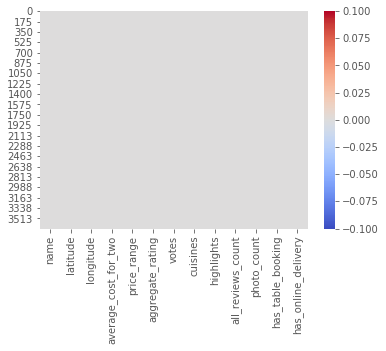

In [12]:
sns.heatmap(zom.isnull(), cmap='coolwarm')

Combine the data fetched from Foursquare and Zomato based on common restaurants

In [13]:
df = fsq.merge(zom, how='inner', left_on='name', right_on='name')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  928 non-null    object 
 1   lat                   928 non-null    float64
 2   lng                   928 non-null    float64
 3   pincode               928 non-null    object 
 4   type                  928 non-null    object 
 5   latitude              928 non-null    float64
 6   longitude             928 non-null    float64
 7   average_cost_for_two  928 non-null    int64  
 8   price_range           928 non-null    int64  
 9   aggregate_rating      928 non-null    float64
 10  votes                 928 non-null    int64  
 11  cuisines              928 non-null    object 
 12  highlights            928 non-null    object 
 13  all_reviews_count     928 non-null    int64  
 14  photo_count           928 non-null    int64  
 15  has_table_booking     9

As lat,lng and latitude,longitude are duplicates of each other, drop one pair

In [15]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

Look at basic information and statistics for the merged table

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  928 non-null    object 
 1   lat                   928 non-null    float64
 2   lng                   928 non-null    float64
 3   pincode               928 non-null    object 
 4   type                  928 non-null    object 
 5   average_cost_for_two  928 non-null    int64  
 6   price_range           928 non-null    int64  
 7   aggregate_rating      928 non-null    float64
 8   votes                 928 non-null    int64  
 9   cuisines              928 non-null    object 
 10  highlights            928 non-null    object 
 11  all_reviews_count     928 non-null    int64  
 12  photo_count           928 non-null    int64  
 13  has_table_booking     928 non-null    int64  
 14  has_online_delivery   928 non-null    int64  
dtypes: float64(3), int64(7)

In [29]:
df.describe(include='all')

name         lat         lng pincode       type  \
count               928  928.000000  928.000000     928        928   
unique              176         NaN         NaN      58         47   
top     Cafe Coffee Day         NaN         NaN  411004  Fast Food   
freq                 66         NaN         NaN     151        124   
mean                NaN   18.523253   73.851635     NaN        NaN   
std                 NaN    0.028538    0.037079     NaN        NaN   
min                 NaN   18.440685   73.766671     NaN        NaN   
25%                 NaN   18.512350   73.833940     NaN        NaN   
50%                 NaN   18.518451   73.842713     NaN        NaN   
75%                 NaN   18.524296   73.872360     NaN        NaN   
max                 NaN   18.671948   73.937133     NaN        NaN   

        average_cost_for_two  price_range  aggregate_rating         votes  \
count             928.000000   928.000000        928.000000    928.000000   
unique                   NaN          NaN               NaN           NaN   
top                      NaN          NaN               NaN           NaN   
freq                     NaN          NaN               NaN           NaN   
mean              610.021552     1.743534          3.908297   1622.728448   
std               420.742908     0.763912          0.616884   2172.220883   
min               100.000000     1.000000          0.000000      0.000000   
25%               350.000000     1.000000          3.700000    262.000000   
50%               500.000000     2.000000          4.000000    774.000000   
75%               600.000000     2.000000          4.200000   2434.750000   
max              2100.000000     4.000000          4.700000  30737.000000   

                                              cuisines  \
count                                              928   
unique                                             144   
top     Cafe, Fast Food, Desserts, Beverages, Sandwich   
freq                                                66   
mean                                               NaN   
std                                                NaN   
min                                                NaN   
25%                                                NaN   
50%                                                NaN   
75%                                                NaN   
max                                                NaN   

                                               highlights  all_reviews_count  \
count                                                 928         928.000000   
unique                                                170                NaN   
top     ['Credit Card', 'Debit Card', 'Delivery', 'Cas...                NaN   
freq                                                   66                NaN   
mean                                                  NaN         362.492457   
std                                                   NaN         518.994746   
min                                                   NaN           0.000000   
25%                                                   NaN          31.000000   
50%                                                   NaN         198.000000   
75%                                                   NaN         356.750000   
max                                                   NaN        2621.000000   

        photo_count  has_table_booking  has_online_delivery  
count    928.000000         928.000000           928.000000  
unique          NaN                NaN                  NaN  
top             NaN                NaN                  NaN  
freq            NaN                NaN                  NaN  
mean     435.024784           0.082974             0.632543  
std      981.523962           0.275992             0.482372  
min        0.000000           0.000000             0.000000  
25%       46.000000           0.000000             0.000000  
50%       95.000000           0.00000

In [19]:
df.head()

name        lat        lng pincode       type  \
0     Vohuman Cafe  18.532555  73.876834  411001  Breakfast   
1          Gajalee  18.527478  73.878215  411001    Seafood   
2  La Bouchee d'Or  18.538931  73.876677  411001     Bakery   
3  La Bouchee d'Or  18.558395  73.803787  411007     Bakery   
4  La Bouchee d'Or  18.558395  73.803787  411007     Bakery   

   average_cost_for_two  price_range  aggregate_rating  votes  \
0                   250            1               4.6   4603   
1                  1000            3               4.2    647   
2                   600            2               4.1    243   
3                   600            2               4.1    243   
4                   600            2               4.1    243   

                         cuisines  \
0                     Street Food   
1  Seafood, Mughlai, North Indian   
2                    Cafe, Bakery   
3                    Cafe, Bakery   
4                    Cafe, Bakery   

                                          highlights  all_reviews_count  \
0  ['Cash', 'Takeaway Available', 'Breakfast', 'L...               1996   
1  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...                306   
2  ['Breakfast', 'Delivery', 'Credit Card', 'Lunc...                110   
3  ['Breakfast', 'Delivery', 'Credit Card', 'Lunc...                110   
4  ['Breakfast', 'Delivery', 'Credit Card', 'Lunc...                110   

   photo_count  has_table_booking  has_online_delivery  
0         1951                  0                    1  
1          493                  0                    0  
2          298                  0                    0  
3          298                  0                    0  
4          298                  0                    0

Exploratory Data Analysis

1. Distribution of cleaned and merged data based on category

<BarContainer object of 12 artists>

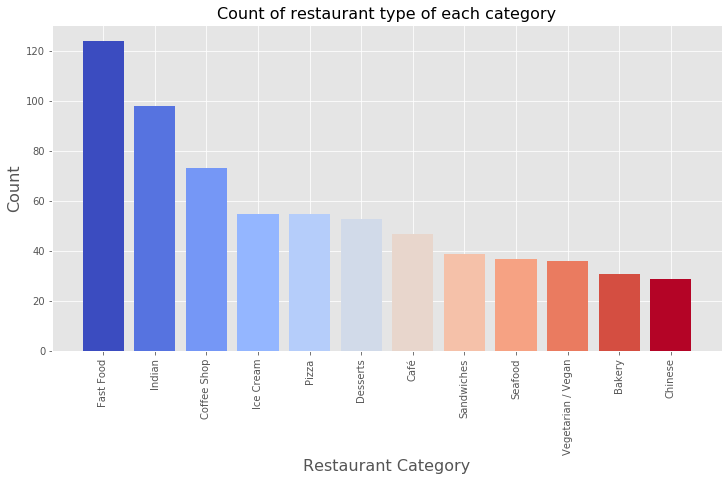

In [42]:
toptype = df[df['type'].isin(df['type'].value_counts().sort_values()[df['type'].value_counts() > 25].index)]
#plt.figure(figsize=(12,7), tight_layout=True)
#sns.countplot(x="type", data=toptype)

dist = toptype['type'].value_counts()
colors = cm.coolwarm(np.linspace(0, 1, len(dist.index)))
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 90)
plt.xlabel("Restaurant Category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of restaurant type of each category", fontsize = 16)
plt.bar(dist.index, dist.values, color = colors)

2. Distribution of restaurants based on cuisines

In [44]:
# Get all the different cuisines in a list
cuisines = []
for ind in df.index:
    tmp = re.findall(r"'([^']+)'", str(df['cuisines'][ind].split(',')))
    for item in tmp:
        cuisines.append(item)
features = list(set(cuisines))

# Prepare a 2D numpy array to record cuisines served by each individual restaurant
# Rows represent a data point or a restaurant
# Columns represent different cuisine
feat = np.zeros((len(df),len(features)), dtype=int)

# Populate the array by traversing through the dataframe and parsing 'cuisine' column
for ind in df.index:
    tmp = re.findall(r"'([^']+)'", str(df['cuisines'][ind].split(',')))
    for item in tmp:
        feat[ind][features.index(item)] = 1
        
df_cuisine = pd.DataFrame(feat, columns=features)

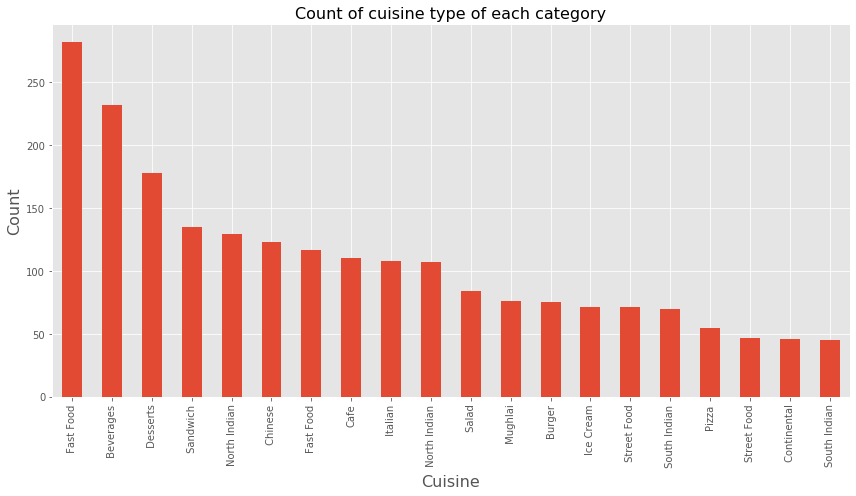

In [45]:
# Prepare a dictionary to store counts of each individual cuisine and then plot a bargraph
dict_count = {}
for feat in features:
    dict_count[feat] = len(df_cuisine[df_cuisine[feat] == 1])

cuisine_count = pd.DataFrame.from_dict(dict_count, orient='index', columns=['count'])    

top_cuisine = pd.DataFrame(cuisine_count['count'].sort_values(ascending=False).head(20))

plt.figure(figsize=(12,7), tight_layout=True)
plt.xlabel("Cuisine", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of cuisine type of each category", fontsize = 16)
top_cuisine['count'].plot.bar()

3. Explore restaurants based on highlights (i.e features/services provided by the restaurants)

In [46]:
# Collate all the highlights in one list
high = []
for ind in df.index:
    tmp = re.findall(r"'([^']+)'", df['highlights'][ind])
    for item in tmp:
        high.append(item)

features = list(set(high))

feat = np.zeros((len(df),len(features)), dtype=int)

for ind in df.index:
    tmp = re.findall(r"'([^']+)'", df['highlights'][ind])
    for item in tmp:
        feat[ind][features.index(item)] = 1
        
df_high = pd.DataFrame(feat, columns=features)

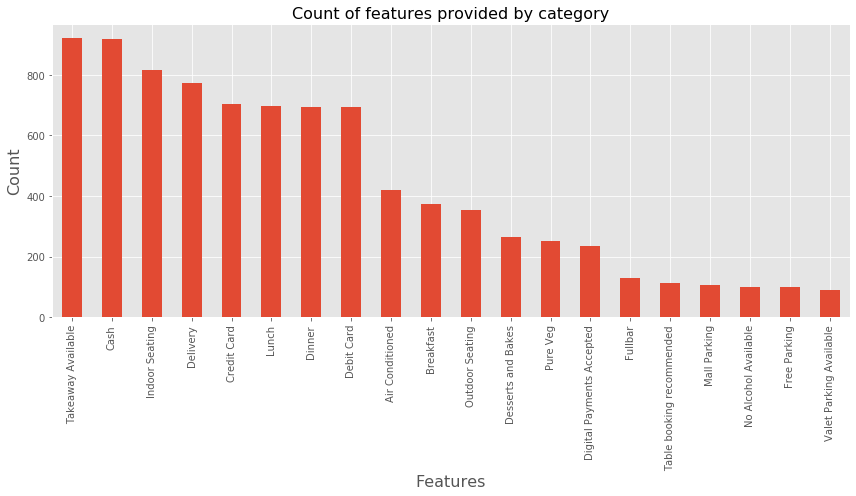

In [36]:
# Prepare a dictionary to store counts of each individual cuisine and then plot a bargraph
dict_count = {}
for feat in features:
    dict_count[feat] = len(df_high[df_high[feat] == 1])

high_count = pd.DataFrame.from_dict(dict_count, orient='index', columns=['count'])    

top_high = pd.DataFrame(high_count['count'].sort_values(ascending=False).head(20))

plt.figure(figsize=(12,7), tight_layout=True)
plt.xlabel("Features", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of features provided by category", fontsize = 16)
top_high['count'].plot.bar()

4. Explore restaurants by ratings

Text(0.5, 1.0, 'Count of venues with given rating')

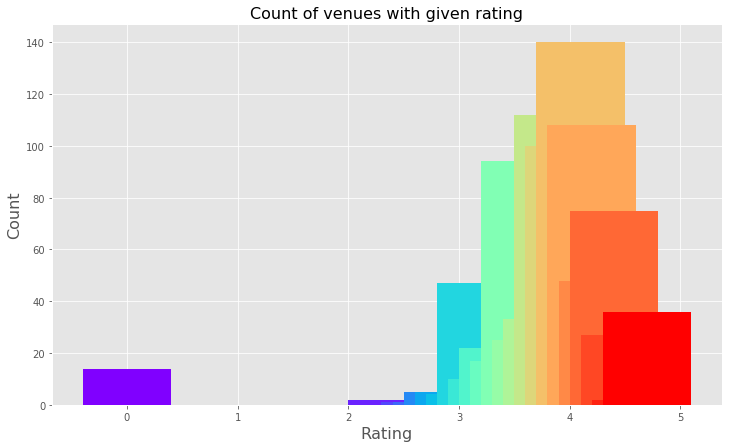

In [48]:
#df['rating'] = selected_venues['rating'].astype(float)
rating = df['aggregate_rating'].value_counts().sort_index()
plt.figure(figsize = (12, 7))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

5. Explore restaurants by average cost for two

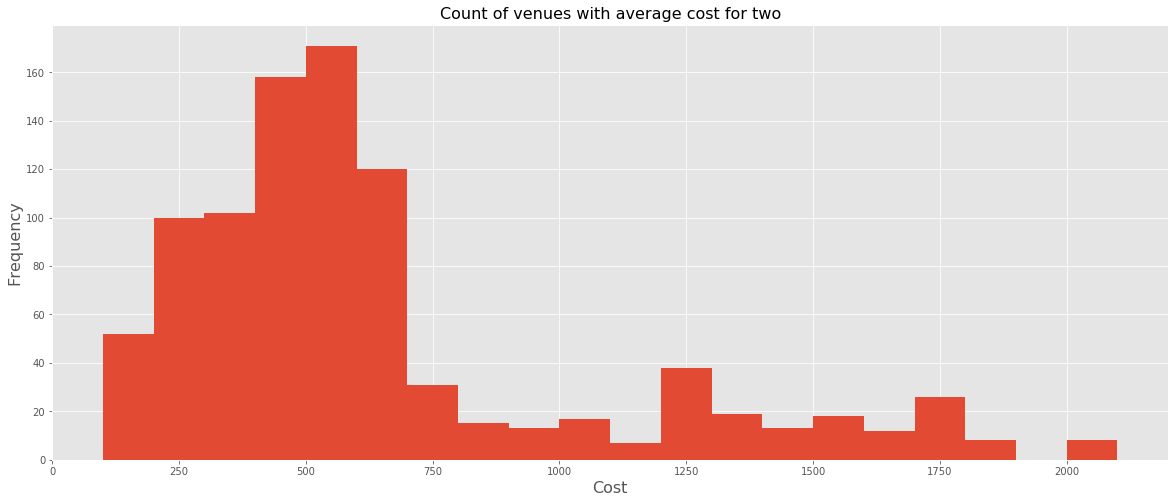

In [50]:
plt.figure(figsize = (12, 7))
plt.xlabel("Cost", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with average cost for two", fontsize = 16)
df['average_cost_for_two'].plot(kind='hist',bins=20, rot=0, figsize=(20,8))

6. Explore number of restaurants with number of review counts

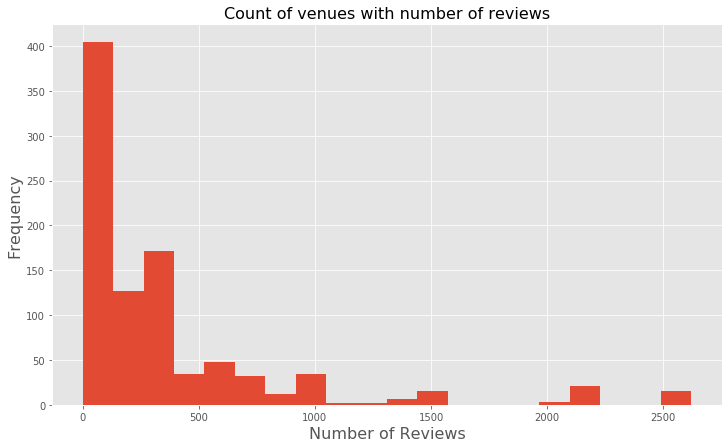

In [51]:
plt.figure(figsize = (12, 7))
plt.xlabel("Number of Reviews", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with number of reviews", fontsize = 16)
df['all_reviews_count'].plot(kind='hist',bins=20)

7. Explore restaurants based on number of photos

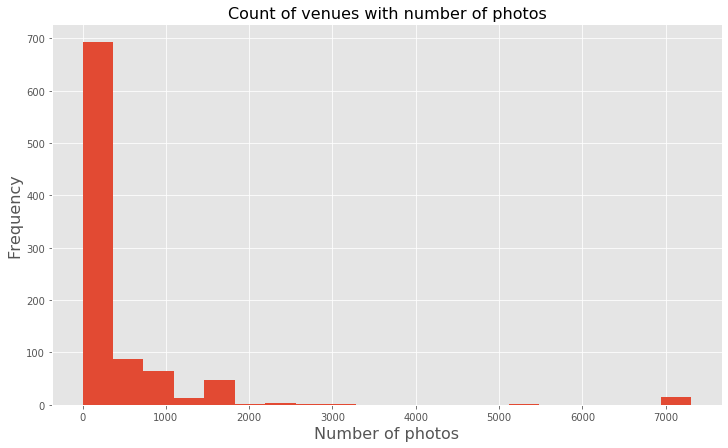

In [52]:
plt.figure(figsize = (12, 7))
plt.xlabel("Number of photos", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with number of photos", fontsize = 16)
df['photo_count'].plot(kind='hist',bins=20)

## Find an optimal location for restaurant
With the vibrant nature of the localities, the popular eateries are often crowded with significant wait times. Hence there is always a need for restaurants/eating joints near the popular area. First let's plot all the resturants on a map. Visually multiple clusters of locality can be easily observed

In [53]:
address = 'Pune, India'
geolocator = Nominatim(user_agent="pune_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_pune = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for ind in df.index:
    name = df['name'][ind]
    pin = df['pincode'][ind]
    lat = df['lat'][ind]
    lng = df['lng'][ind]
    label = '{}, {}'.format(name,pin)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune)
    
map_pune

In [54]:
df['rating'] = round(df['aggregate_rating']).astype(int)

In [55]:
df['norm_votes'] = df['votes']/df['votes'].max().round(2) * 10

In [56]:
address = 'Pune, India'
geolocator = Nominatim(user_agent="pune_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_pune = folium.Map(location=[latitude, longitude], zoom_start=12)
color_map = { 0: 'green', 1: 'black', 2: 'yellow', 3:'blue', 4:'red', 5:'white'}

# add markers to map
for ind in df.index:
    name = df['name'][ind]
    pin = df['pincode'][ind]
    lat = df['lat'][ind]
    lng = df['lng'][ind]
    rating = df['rating'][ind]
    pop = df['norm_votes'][ind]
    if(df['votes'][ind] == 0):
        continue
    label = '{}, {}'.format(name,pin)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop,
        popup=label,
        color=color_map[rating],
        fill=True,
        fill_color= color_map[rating],#'#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune)
    
map_pune

Find number of restaurants per pincode. Based on the results we can easily observe that there are very few areas with concentrated numbers of restaurants. Lets explore further

In [89]:
df_pincode = df.groupby('pincode').count()
df_pincode = df_pincode[df_pincode.index != 'India']
df_pincode = df_pincode[df_pincode.index != 'INDIA']

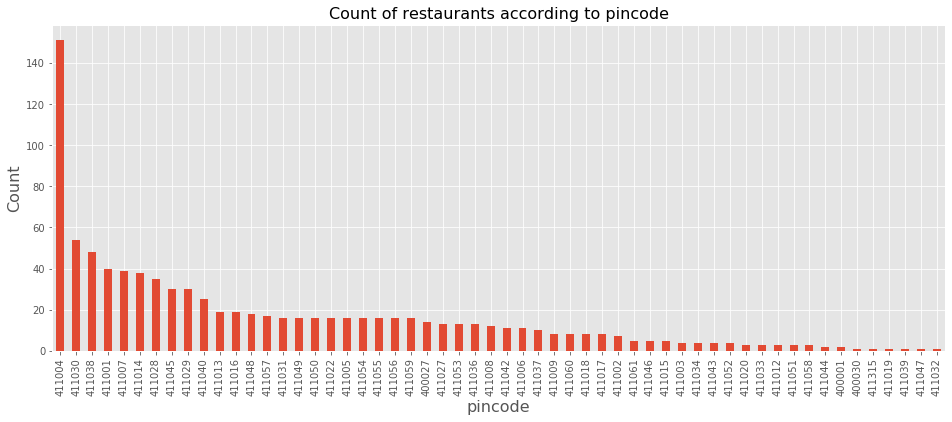

In [91]:
#df_pincode = df.groupby('pincode').count()

plt.figure(figsize = (16, 6))
plt.xlabel("Number of restaurants", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of restaurants according to pincode", fontsize = 16)
df_pincode['votes'].sort_values(ascending=False).plot(kind='bar')

In [59]:
#address = 'Pune, India'
#geolocator = Nominatim(user_agent="pune_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
df_pincode = df.groupby('pincode').mean()

latitude = 18.5204
longitude = 73.8576
map_pune = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for ind in df_pincode.index:
    pin = ind
    lat = df_pincode['lat'][ind]
    lng = df_pincode['lng'][ind]
    if df_pincode['rating'][ind] > 4:
        colored = 'blue'
    else:
        colored = 'red'
    pop = df_pincode['norm_votes'][ind]
    label = '{}'.format(pin)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop*10,
        popup=label,
        color=colored,
        fill=True,
        fill_color= colored,#'#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune)
    
map_pune

USe KMeans Clustering to cluster the restaurants into similar types

In [60]:
NO_OF_CLUSTERS=5

df_cluster = df[['lat', 'lng', 'average_cost_for_two', 'price_range', 'aggregate_rating', 'votes', 'all_reviews_count', 'photo_count', 'has_table_booking', 'has_online_delivery']]
KMeans_model = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=10).fit(df_cluster)
df.insert(0, 'cluster_labels', KMeans_model.labels_)
df.head()

cluster_labels             name        lat        lng pincode       type  \
0               1     Vohuman Cafe  18.532555  73.876834  411001  Breakfast   
1               0          Gajalee  18.527478  73.878215  411001    Seafood   
2               0  La Bouchee d'Or  18.538931  73.876677  411001     Bakery   
3               0  La Bouchee d'Or  18.558395  73.803787  411007     Bakery   
4               0  La Bouchee d'Or  18.558395  73.803787  411007     Bakery   

   average_cost_for_two  price_range  aggregate_rating  votes  \
0                   250            1               4.6   4603   
1                  1000            3               4.2    647   
2                   600            2               4.1    243   
3                   600            2               4.1    243   
4                   600            2               4.1    243   

                         cuisines  \
0                     Street Food   
1  Seafood, Mughlai, North Indian   
2                    Cafe, Bakery   
3                    Cafe, Bakery   
4                    Cafe, Bakery   

                                          highlights  all_reviews_count  \
0  ['Cash', 'Takeaway Available', 'Breakfast', 'L...               1996   
1  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...                306   
2  ['Breakfast', 'Delivery', 'Credit Card', 'Lunc...                110   
3  ['Breakfast', 'Delivery', 'Credit Card', 'Lunc...                110   
4  ['Breakfast', 'Delivery', 'Credit Card', 'Lunc...                110   

   photo_count  has_table_booking  has_online_delivery  rating  norm_votes  
0         1951                  0                    1       5    1.497544  
1          493                  0                    0       4    0.210495  
2          298                  0                    0       4    0.079058  
3          298                  0                    0       4    0.079058  
4          298                  0                    0       4    0.079058

In [61]:
address = 'Pune, India'
geolocator = Nominatim(user_agent="pune_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_pune = folium.Map(location=[latitude, longitude], zoom_start=12)
color_map = { 0: 'green', 1: 'yellow', 2:'blue', 3:'red', 4:'black'}

# add markers to map
for ind in df.index:
    votes = df['votes'][ind]
    lat = df['lat'][ind]
    lng = df['lng'][ind]
    rating = df['aggregate_rating'][ind]
    cluster = df['cluster_labels'][ind]
    pop = df['norm_votes'][ind]
    label = '{}, {}'.format(votes,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=pop,
        popup=label,
        color=color_map[cluster],
        fill=True,
        fill_color= color_map[cluster],#'#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune)
    
map_pune

In [62]:
df.groupby('cluster_labels').mean()

lat        lng  average_cost_for_two  price_range  \
cluster_labels                                                            
0               18.523359  73.851044            528.849903     1.619883   
1               18.522220  73.853559           1011.811024     2.385827   
2               18.524270  73.851578            556.015038     1.612782   
3               18.511401  73.883180            471.428571     1.428571   
4               18.515898  73.841827           1006.666667     3.000000   

                aggregate_rating         votes  all_reviews_count  \
cluster_labels                                                      
0                       3.706433    358.670565          97.465887   
1                       4.234646   4093.653543        1082.779528   
2                       4.096992   2159.293233         396.289474   
3                       4.028571  16846.000000         833.142857   
4                       4.646667   7313.733333        2509.000000   

                photo_count  has_table_booking  has_online_delivery    rating  \
cluster_labels                                                                  
0                118.467836           0.037037             0.551657  3.713450   
1               1128.212598           0.188976             0.937008  4.181102   
2                337.766917           0.127820             0.635338  3.973684   
3                339.142857           0.000000             0.142857  4.000000   
4               7161.733333           0.000000             1.000000  4.933333   

                norm_votes  
cluster_labels              
0                 0.116690  
1                 1.331832  
2                 0.702506  
3                 5.480691  
4                 2.379456

5 categories of restaurants can be calearly seen.
<br>Cluster Label 0: Lowly Rated
<br>Cluster Label 1: Moderately Rated, Expensive
<br>Cluster Label 2: Moderately Rated, Affordable
<br>Cluster Label 3: Moderately Rated, Affordable, Very Popular
<br>Cluster Label 4: Highly Rated, Expensive, Moderately Popular

<br>Based on our results, the recommendation of starting a hotel should in Category corresponding to Cluster Label 3 or 4.


In [98]:
df[df.cluster_labels == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 142 to 460
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cluster_labels        15 non-null     int32  
 1   name                  15 non-null     object 
 2   lat                   15 non-null     float64
 3   lng                   15 non-null     float64
 4   pincode               15 non-null     object 
 5   type                  15 non-null     object 
 6   average_cost_for_two  15 non-null     int64  
 7   price_range           15 non-null     int64  
 8   aggregate_rating      15 non-null     float64
 9   votes                 15 non-null     int64  
 10  cuisines              15 non-null     object 
 11  highlights            15 non-null     object 
 12  all_reviews_count     15 non-null     int64  
 13  photo_count           15 non-null     int64  
 14  has_table_booking     15 non-null     int64  
 15  has_online_delivery   

Use the model_selection module to split the entire dataset into training and testing dataset

In [99]:
X = df[['lat', 'lng', 'average_cost_for_two', 'votes', 'all_reviews_count', 'photo_count', 'has_table_booking', 'has_online_delivery', 'rating']]
y = df['aggregate_rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Construct Multiple Linear Regression Model to determine the aggregate rating of a restaurant

In [100]:
regr = linear_model.LinearRegression()
X = np.asanyarray(X_train)
y = np.asanyarray(y_train)
regr.fit (X, y)

LinearRegression()

In [101]:
y_hat = regr.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.06
Variance score: 0.88
